In [1]:
from google.colab import files

uploaded = files.upload()


print(uploaded.keys())

Saving pharma.csv to pharma.csv
dict_keys(['pharma.csv'])


In [14]:
print(df.head())

  Region Age_Group    Product  Marketing_Spend   Sales  Effectiveness  \
0  North     18-25  Product A            50000  120000             80   
1  North     26-35  Product B            60000  150000             85   
2  South     18-25  Product A            45000  110000             78   
3  South     36-45  Product C            70000  160000             90   
4   East     26-35  Product B            55000  140000             82   

   Trial_Period  
0             1  
1             1  
2             1  
3             2  
4             2  


Missing values:
 Region             0
Age_Group          0
Product            0
Marketing_Spend    0
Sales              0
Effectiveness      0
Trial_Period       0
dtype: int64


<ipython-input-18-ad5e6e5282bf>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


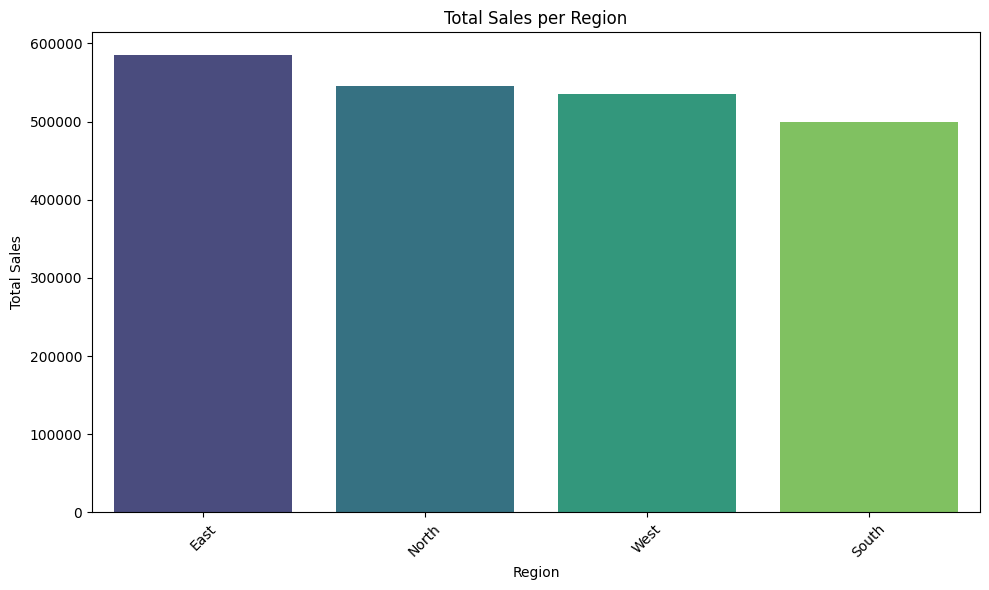

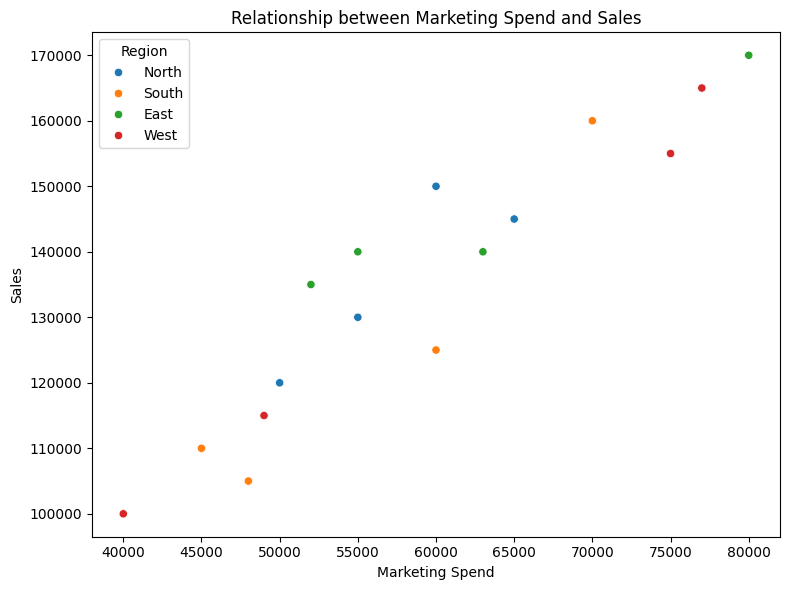

<ipython-input-18-ad5e6e5282bf>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Effectiveness', data=df, palette='coolwarm')


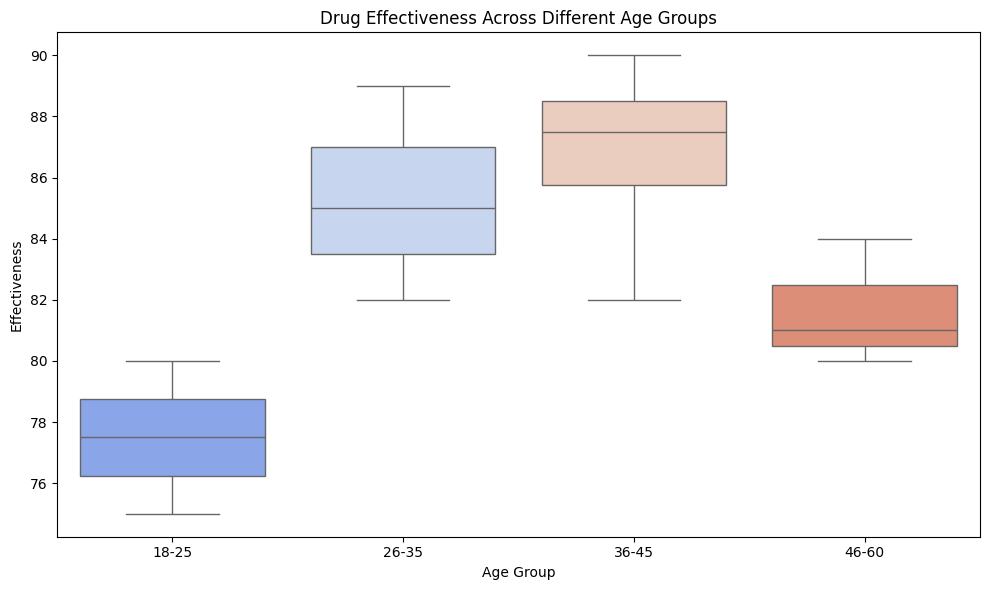

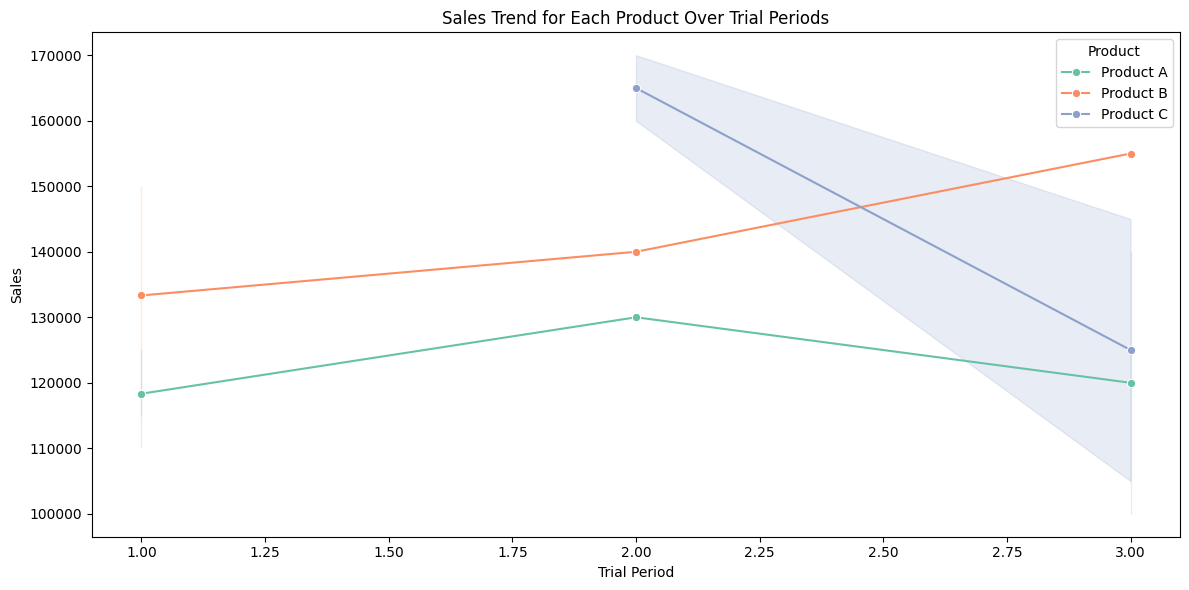

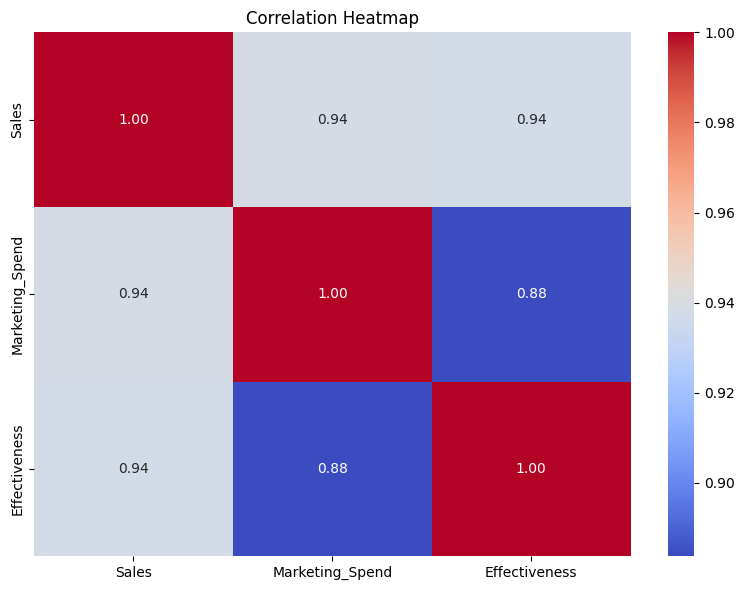


--- Summary of Patterns and Trends ---
- Regions with higher marketing spend tend to have higher sales.
- Drug effectiveness shows variation across age groups, with some age groups having higher effectiveness.
- Sales trends vary by product, with certain products performing better during specific trial periods.
- Strong correlation observed between marketing spend and sales (if correlation > 0.5).


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('pharma.csv')


print("Missing values:\n", df.isnull().sum())


df = df.drop_duplicates()


plt.figure(figsize=(10, 6))
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Marketing_Spend', y='Sales', data=df, hue='Region', palette='tab10')
plt.title('Relationship between Marketing Spend and Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Effectiveness', data=df, palette='coolwarm')
plt.title('Drug Effectiveness Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Effectiveness')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Trial_Period', y='Sales', hue='Product', data=df, marker='o', palette='Set2')
plt.title('Sales Trend for Each Product Over Trial Periods')
plt.xlabel('Trial Period')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

correlation_matrix = df[['Sales', 'Marketing_Spend', 'Effectiveness']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

print("\n--- Summary of Patterns and Trends ---")
print("- Regions with higher marketing spend tend to have higher sales.")
print("- Drug effectiveness shows variation across age groups, with some age groups having higher effectiveness.")
print("- Sales trends vary by product, with certain products performing better during specific trial periods.")
print("- Strong correlation observed between marketing spend and sales (if correlation > 0.5).")
